<font face="微軟正黑體">

## 讀取 txt 檔

* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints

- 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
- [字串分割](http://www.runoob.com/python/att-string-split.html)
- 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

<font face="微軟正黑體">

## 練習時間
- 1-1 讀取 txt 檔，請讀取 text file
- 1-2 將所提供的 txt 轉成 pandas dataframe
- 2 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [91]:
# 假如我們不想把資料載到自己的電腦裡?

import requests
import pandas as pd
import numpy as np

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [92]:
# 用 request 傳送回來的資料不會認得斷行符號

response = requests.get(target_url)
data = response.text

print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [93]:
# 找到換行符號，用該符號做字串分割後，把它拿掉

split_tag = "\n"
split_data = data.split(split_tag)

print(len(split_data))
split_data[:3]

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']

## 將 txt 轉成 pandas dataframe

In [94]:
arrange_data = [data.split("\t") for data in split_data]
col_label = ["name", "url"]
    
df = pd.DataFrame(arrange_data, columns=col_label)
df.head()

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


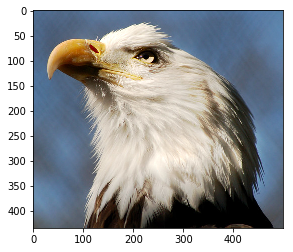

In [95]:
# Get first image from DataFrame

first_link = df.loc[0, "url"]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [101]:
IMAGE_SIZE = (300, 300)
IMAGE_RESAMPLE = Image.ANTIALIAS


def img2arr_fromURLs(url_list, resize=False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    img_list = []
    
    for url in url_list:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            
            img_list.append(img.resize(IMAGE_SIZE, IMAGE_RESAMPLE) if resize else img)
            
        except OSError as ex:
            print("{} cannot identify image file, {}".format(ex.__class__, url))
        
    return img_list

<class 'OSError'> cannot identify image file, http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


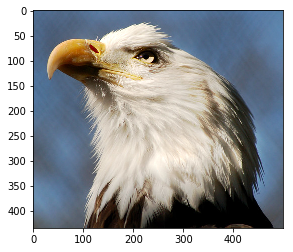

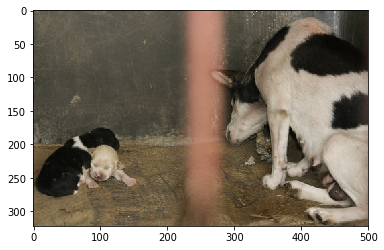

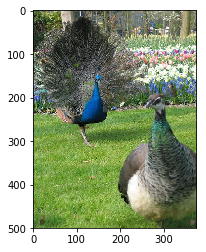

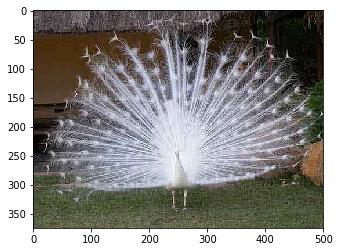

In [102]:
# img2arr_fromURLs - resize = False

result = img2arr_fromURLs(df[0:5]["url"].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

<class 'OSError'> cannot identify image file, http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


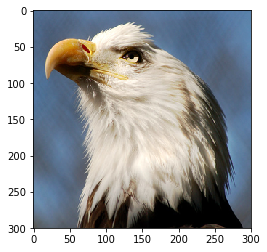

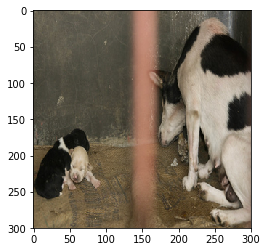

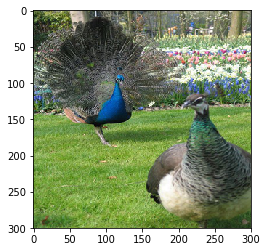

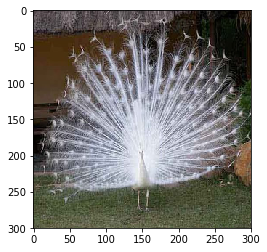

In [104]:
# img2arr_fromURLs - resize = True

result = img2arr_fromURLs(df[0:5]["url"].values, resize=True)
print("Total images that we got: %i " % len(result))

for im_get in result:
    plt.imshow(im_get)
    plt.show()